<a href="https://colab.research.google.com/github/pradiptars/Ml_kaggle_Road_Accident/blob/main/Road_Accident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!pip install kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c playground-series-s5e10

  0% 0.00/7.76M [00:00<?, ?B/s]
100% 7.76M/7.76M [00:00<00:00, 823MB/s]


In [6]:
!unzip playground-series-s5e10.zip

Archive:  playground-series-s5e10.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [7]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [8]:
df = pd.concat([train, test], axis=0)

In [9]:
df.head(2)

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35


<Axes: >

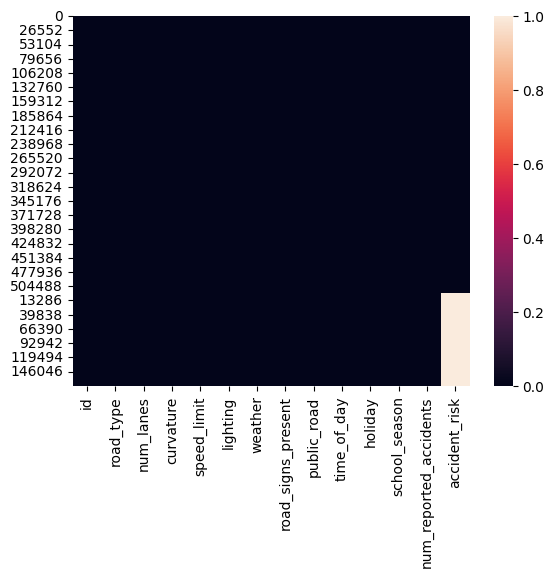

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.select_dtypes(include='object').columns

Index(['road_type', 'lighting', 'weather', 'time_of_day'], dtype='object')

In [23]:
df.dropna(inplace=True)

In [24]:
print('Shape of DataFrame after dropping nulls:', df.shape)

Shape of DataFrame after dropping nulls: (517754, 14)


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
df['road_type'].value_counts()

,count
road_type,
highway,173672
rural,172719
urban,171363


In [15]:
df.head(2)

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35


In [16]:
df.select_dtypes(include='object').columns

Index(['road_type', 'lighting', 'weather', 'time_of_day'], dtype='object')

In [17]:
df['road_type_numeric'] = pd.factorize(df['road_type'])[0]
display(df[['road_type', 'road_type_numeric']].head())

df['lighting_numeric'] = pd.factorize(df['lighting'])[0]
display(df[['lighting', 'lighting_numeric']].head())

df['weather_numeric'] = pd.factorize(df['weather'])[0]
display(df[['weather', 'weather_numeric']].head())

df['time_of_day_numeric'] = pd.factorize(df['time_of_day'])[0]
display(df[['time_of_day', 'time_of_day_numeric']].head())

,road_type,road_type_numeric
0,urban,0
1,urban,0
2,rural,1
3,highway,2
4,rural,1


,lighting,lighting_numeric
0,daylight,0
1,daylight,0
2,dim,1
3,dim,1
4,daylight,0


,weather,weather_numeric
0,rainy,0
1,clear,1
2,clear,1
3,rainy,0
4,foggy,2


,time_of_day,time_of_day_numeric
0,afternoon,0
1,evening,1
2,morning,2
3,morning,2
4,evening,1


In [18]:
df.head(2)

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk,road_type_numeric,lighting_numeric,weather_numeric,time_of_day_numeric
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13,0,0,0,0
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35,0,0,1,1


In [19]:
df.drop(['road_type', 'lighting', 'weather', 'time_of_day'], axis=1, inplace=True)

In [20]:
df.head(2)

,id,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,accident_risk,road_type_numeric,lighting_numeric,weather_numeric,time_of_day_numeric
0,0,2,0.06,35,False,True,False,True,1,0.13,0,0,0,0
1,1,4,0.99,35,True,False,True,True,0,0.35,0,0,1,1


<Axes: >

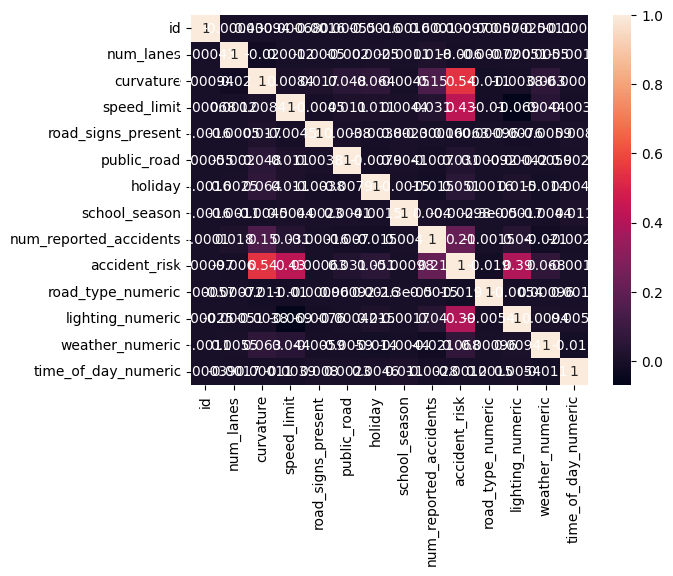

In [21]:
sns.heatmap(df.corr(),annot=True)

In [26]:
# Separate features (X) and target (y)
X = df.drop(['id', 'accident_risk'], axis=1)
y = df['accident_risk']

In [27]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Shape of X_train_scaled:', X_train_scaled.shape)
print('Shape of X_test_scaled:', X_test_scaled.shape)

Shape of X_train_scaled: (414203, 12)
Shape of X_test_scaled: (103551, 12)


In [29]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [30]:
# Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)

In [31]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')

Mean Squared Error: 0.0091
R-squared: 0.6704


In [32]:
df.keys()

Index(['id', 'num_lanes', 'curvature', 'speed_limit', 'road_signs_present',
       'public_road', 'holiday', 'school_season', 'num_reported_accidents',
       'accident_risk', 'road_type_numeric', 'lighting_numeric',
       'weather_numeric', 'time_of_day_numeric'],
      dtype='object')

In [33]:
X = df.drop('accident_risk', axis=1)
y = df['accident_risk']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
lr.score(X_test, y_test)

0.6703566336376408

In [39]:
import xgboost as xgb
xgb= xgb.XGBRegressor(random_state=42, bbooster='gbtree')
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, bbooster='gbtree', booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, ...)

In [40]:
xgb.score(X_test, y_test)

0.8844564082814098

In [41]:
y_pred = np.exp(xgb.predict(X_test))

In [42]:
submit_test = pd.concat([test['id'], pd.DataFrame(y_pred, columns=['accident_risk'])], axis=1)
submit_test.head()

,id,accident_risk
0,517754,1.134996
1,517755,1.388328
2,517756,1.296723
3,517757,1.338733
4,517758,1.391090


In [43]:
submit_test.to_csv('road_accident_submission.csv', index=False)